In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

%matplotlib inline

from scipy import sparse
from sklearn.metrics.pairwise import pairwise_distances

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Import DataFrame

In [2]:
nba_stats19 = pd.read_csv('../data/nba_stats19.csv', index_col = [0])

## Renaming columns

In [3]:
nba_stats19.drop(columns = ['DREB_y', 'T_DREB%_y', 'T_STL%_y', 'T_BLK%_y', 'Age_y','FT%_y'], inplace = True)
nba_stats19.rename(columns = {'Age_x': 'Age', 'FT%_x': 'FT%', 'DREB_x': 'DREB', 'T_DREB%_x' : 'T_DREB%',
                             'T_STL%_x': 'T_STL%', 'T_BLK%_x': 'T_BLK%'}, inplace = True)

# label stats

In [4]:
offensive_stats = ['FG%', '3P%', 'OREB', 'TOV', 'DD2',
            'TD3', 'T_FGM%', 'T_FGA%', 'T_3PM%', 'T_3PA%', 'T_OREB%',
            'T_TOV%', 'T_STL%', '2ND_CH_PTS', 'FB_PTS', 'BSR Off.',
            'OOR Off.', 'OVR Off.', 'WAR', 'FP', 'STL', 'USG%', 'PAINT_PTS', 'FGM_AST%', 'FGM_UAST%',
                  'AST', 'FGA_2P%', '2PT_MR%'] 
#Only adding in player and salary for this notebook modeling

# kmeans clustering

In [5]:
X = nba_stats19[offensive_stats]
y = nba_stats19['Player']

#scale data
sc = StandardScaler()
X_sc = sc.fit_transform(X)

#dimensionality reduction
pca = PCA(n_components = 5)
pca.fit(X_sc)
X_pca = pca.transform(X_sc)
print("Cumulative Explained Variance:", pca.explained_variance_ratio_.sum())

Cumulative Explained Variance: 0.6973524110034053


In [6]:
#creating clusters
offensive = KMeans(n_clusters = 3,random_state= 248)
offensive.fit(X_pca)
y_kmeans = offensive.predict(X_pca)
nba_stats19['off_kmean'] = offensive.labels_
off_sil = silhouette_score(X_sc, offensive.labels_)
silhouette_score(X_sc, offensive.labels_)

0.20649712181287927

There are 3 clusters

In [7]:
off_cluster0 = nba_stats19[nba_stats19['off_kmean'] == 0]
off_cluster1 = nba_stats19[nba_stats19['off_kmean'] == 1]
off_cluster2 = nba_stats19[nba_stats19['off_kmean'] == 2]

## EDA

In [8]:
nba_stats19.head()

,Player,Age,W,L,MP,FGM,FGA,FG%,3PM,3PA,...,BSR Total,OOR Off.,OOR Def.,OOR Total,OVR Off.,OVR Def.,OVR total,WAR,salary,off_kmean
0,Ante Zizic,22,0,6,11.7,1.8,3.5,52.4,0.0,0.0,...,-6.6,0.1,-6.0,-5.9,-3.7,-3.0,-6.7,-0.1,"$2,281,800",0
1,Boban Marjanovic,31,6,3,12.0,2.8,5.4,51.0,0.0,0.1,...,-2.2,14.4,-1.8,12.6,3.3,-2.8,0.6,0.2,"$3,500,000",0
2,Bogdan Bogdanovic,27,8,10,27.5,5.2,12.7,40.6,2.8,7.2,...,3.2,-0.5,-0.1,-0.7,2.8,-0.1,2.6,1.3,"$8,529,386",2
3,Bojan Bogdanovic,30,12,8,33.1,7.3,15.3,47.4,3.1,6.8,...,-0.1,7.8,-2.2,5.6,2.7,-1.6,1.1,1.3,"$17,000,000",2
4,Brandon Goodwin,24,1,0,2.5,0.0,0.0,0.0,0.0,0.0,...,-4.2,-6.6,-13.3,-19.9,-22.9,15.1,-7.8,0.0,0,1


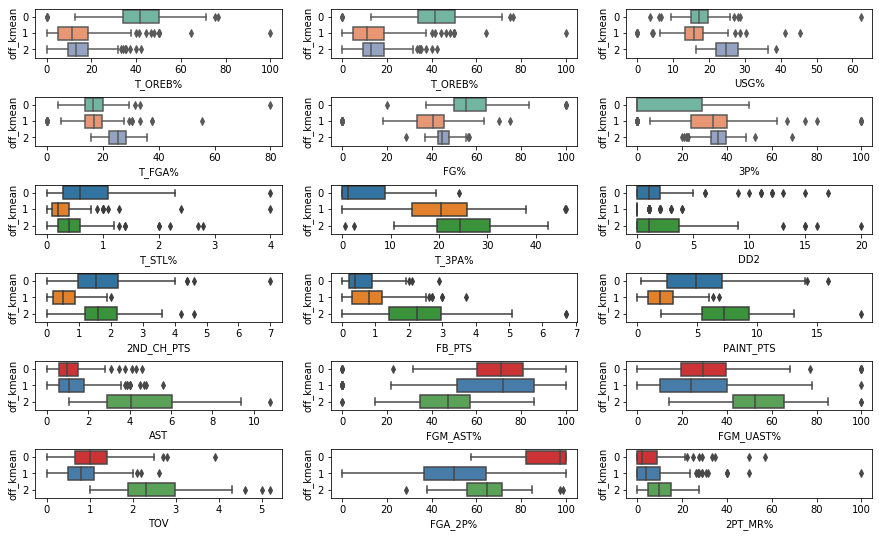

In [11]:
fig, axes = plt.subplots(6, 3, figsize = (15, 9))
plt.subplots_adjust(hspace = 0.8)
sns.boxplot(x = 'T_OREB%', y = 'off_kmean', data = nba_stats19, orient="h", palette="Set2", ax = axes[0,0])
sns.boxplot(x = 'T_OREB%', y = 'off_kmean', data = nba_stats19, orient="h", palette="Set2", ax = axes[0,1])
sns.boxplot(x = 'USG%', y = 'off_kmean', data = nba_stats19, orient="h", palette="Set2", ax = axes[0,2])
#---------------------- line 2
sns.boxplot(x = 'T_FGA%', y = 'off_kmean', data = nba_stats19, orient="h", palette="Set2", ax = axes[1,0])
sns.boxplot(x = 'FG%', y = 'off_kmean', data = nba_stats19, orient="h", palette="Set2", ax = axes[1,1])
sns.boxplot(x = '3P%', y = 'off_kmean', data = nba_stats19, orient="h", palette="Set2", ax = axes[1,2])
#---------------------- LINE 3
sns.boxplot(x = 'T_STL%', y = 'off_kmean', data = nba_stats19, orient="h", ax = axes[2,0])
sns.boxplot(x = 'T_3PA%', y = 'off_kmean', data = nba_stats19, orient="h", ax = axes[2,1])
sns.boxplot(x = 'DD2', y = 'off_kmean', data = nba_stats19, orient="h", ax = axes[2,2])
#---------------------- LINE 4
sns.boxplot(x = '2ND_CH_PTS', y = 'off_kmean', data = nba_stats19, orient="h", ax = axes[3,0])
sns.boxplot(x = 'FB_PTS', y = 'off_kmean', data = nba_stats19, orient="h", ax = axes[3,1])
sns.boxplot(x = 'PAINT_PTS', y = 'off_kmean', data = nba_stats19, orient="h", ax = axes[3,2])
#---------------------- LINE 5
sns.boxplot(x = 'AST', y = 'off_kmean', data = nba_stats19, orient="h", palette="Set1", ax = axes[4,0])
sns.boxplot(x = 'FGM_AST%', y = 'off_kmean', data = nba_stats19, orient="h", palette="Set1", ax = axes[4,1])
sns.boxplot(x = 'FGM_UAST%', y = 'off_kmean', data = nba_stats19, orient="h", palette="Set1", ax = axes[4,2])
#---------------------- LINE 6
sns.boxplot(x = 'TOV', y = 'off_kmean', data = nba_stats19, orient="h", palette="Set1", ax = axes[5,0])
sns.boxplot(x = 'FGA_2P%', y = 'off_kmean', data = nba_stats19, orient="h", palette="Set1", ax = axes[5,1])
sns.boxplot(x = '2PT_MR%', y = 'off_kmean', data = nba_stats19, orient="h", palette="Set1", ax = axes[5,2])

In [12]:
print(f'There are {len(off_cluster0)} players in Cluster 0')
print(f'There are {len(off_cluster1)} players in Cluster 1')
print(f'There are {len(off_cluster2)} players in Cluster 2')

There are 100 players in Cluster 0
There are 272 players in Cluster 1
There are 94 players in Cluster 2


**Cluster 0 - Rising Star:** Cluser 0 players are the not as agressive, they aren't used for steals and very few of them have earned any double doubles this season so far. These players are still figuring out their offense strategies. Most of their shots are assisted but about 25% mostly take unassisted shots. However they aren't afraid to shoot when given the ball. They have the biggest spread among the FG%, 2PA%, 3PA% .
- honerable mentions - Tristan Thompson, Steven Adams, Ivan Zubac, Tyson Chandler

**Cluster 1 - The Agressive Offense:** Used the most in their team's play while they are on the floor. They have the most FG attempts, but not the highest total FG%. This group has the lowest spread of FG%, showing that they can probably be dependent to make about 40-50% of their FG. They look to be the most agressive players as they have the biggest spread of steals and 2nd chance points. These players are more likley to score their points unassisted. Since they are used more in plays, they are going to have a more diverse offense role.
 - honerable mentions - Ky Bowman, Kyle Kuzma, Patrick Beverly, Avery Bradley

**Cluster 2 - Risk Taker:** Used for turnovers and making points, less about rebounds and making passes. These players are used for riskier shots. They are more likely to shoot 3 pointers and fast break points. Cluster 2 players are morel likely than any other cluster to be used in a play when on the floor. You can depend on this player to score, but they will need an assist from another team member.
 - honerable mentions - Blake Griffin, Jimmy Butler, Ja Morant, Lou Williams

Player | Cluster | Salary ($) | Current Team | Named Pos
----- | -------| ------ | ------| -------|
Paul Millsap | 0 | 30,500,000 | DEN | PF
Al Horford | 0 |  28,000,000 | PHI | C
Kristaps Porzingis | 0 | 27,285,000 | DAL | PF
Eric Paschall | 0 | 898,310 | GSW | PF
Daniel Gafford | 0 | 898,310 | CHI | C
Nicolas Claxton | 0 | 898,310 | BRK | PF
Otto Porter Jr. | 1 | 27,259,576 | CHI | SF
Marc Gasol | 1 | 25,595,700 | TOR | C
Nicolas Batum | 1 | 25,565,217 | CHO | SF
Matt Thomas | 1 | 898,310 | TOR | SG
Terence Davis | 1 | 898,310 | TOR | SG
Patrick Patterson | 1 | 737,067 | OKC | PF
Stephen Curry | 2 | 40,231,758 | GSW |  PG
Chris Paul | 2 | 38,506,482 | OKC |  PG
Russell Westbrook | 2 | 38,178,000 | HOU | PG
Camelo Anthony | 2 | 2,159,092 | POR | PF
Kendrick Nunn | 2 | 1,416,852 | MIA | SG
Devonte' Graham | 2 | 1,416,852 | CHO | PG